In [1]:
import DnnLib
import numpy as np

# Crear datos de entrada 
x = np.array([[0.5, -0.2, 0.1]]) 
# Crear capa densa: 3 entradas, 2 salidas, con activación ReLU 
layer = DnnLib.DenseLayer(3, 2, DnnLib.ActivationType.RELU) 
# Modificar manualmente los pesos y bias 
layer.weights = np.array([[0.1, 0.2, 0.3], 
[0.4, 0.5, 0.6]]) 
layer.bias = np.array([0.01, -0.02]) 
# Forward con activación 
y = layer.forward(x) 
print("Salida con activación:", y) 
# Forward lineal (sin activación) 
y_lin = layer.forward_linear(x) 
print("Salida lineal:", y_lin) 
# Aplicar activaciones directamente 
print("Sigmoid:", DnnLib.sigmoid(np.array([0.0, 2.0, -1.0]))) 

Salida con activación: [[0.05 0.14]]
Salida lineal: [[0.05 0.14]]
Sigmoid: [0.5        0.88079708 0.26894142]


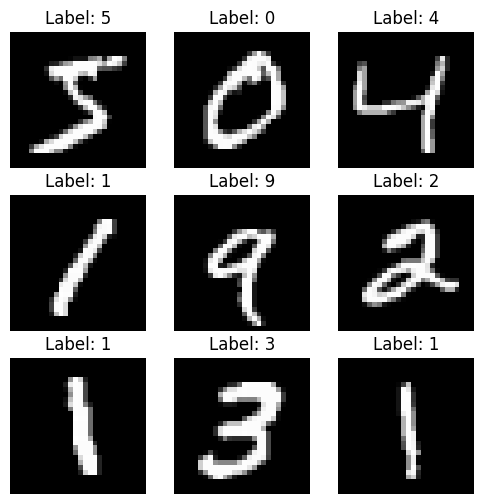

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("mnist_train.npz")
images = data["images"]
labels = data["labels"]

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(f"Label: {labels[i]}")
    plt.axis("off")
plt.show()

In [1]:

import DnnLib
import numpy as np
# Create sample data (XOR problem)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float64)
y = np.array([[0], [1], [1], [0]], dtype=np.float64)
# Create a neural network: 2 -> 4 -> 1
layer1 = DnnLib.DenseLayer(2, 4, DnnLib.ActivationType.RELU)
layer2 = DnnLib.DenseLayer(4, 1, DnnLib.ActivationType.SIGMOID)
optimizer = DnnLib.Adam(learning_rate=0.01)

# Training loop
for epoch in range(100):
    # Forward pass
    h1 = layer1.forward(X)
    output = layer2.forward(h1)
    # Compute loss
    loss = DnnLib.mse(output, y)
    # Backward pass
    loss_grad = DnnLib.mse_gradient(output, y)
    grad2 = layer2.backward(loss_grad)
    grad1 = layer1.backward(grad2)
    # Update parameters
    optimizer.update(layer2)
    optimizer.update(layer1)
    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")